# Práctica 5: Análisis frecuencial de señales



*   Antonia Yepes Quintero
*   Isabella Bedoya Orozco



#Contextualización:

El análisis frecuencial de señales es una herramienta importante en el procesamiento de bioseñales, ya que permite entender y analizar la información contenida en el dominio de la frecuencia. Muchas señales de interés, como las provenientes del cuerpo humano (ECG, EEG, EMG), contienen componentes de frecuencia que revelan información relevante sobre el estado fisiológico del organismo. Esta práctica se centra en la aplicación de los conceptos básicos del análisis de Fourier y en la implementación de filtros frecuenciales para bioseñales digitalizadas.

A través del uso de Python y sus bibliotecas, se exploran técnicas de muestreo, transformadas de Fourier y filtrado, utilizando señales simuladas y reales. De esta manera, es posible adquirir un conocimiento práctico sobre cómo digitalizar señales continuas, analizar su contenido frecuencial, y aplicar transformaciones para eliminar el ruido no deseado o extraer componentes de interés.

In [ ]:
import zipfile
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from google.colab import drive
from scipy.signal import welch, get_window, find_peaks
from scipy.fft import fft, ifft

## 1. Representación de señales

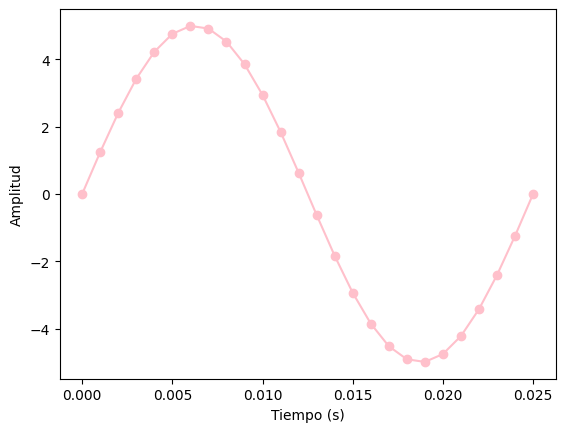

In [ ]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o', color='pink')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se observa claramente que el periodo de la señal analógica o en tiempo continuo es 𝑇𝑝 = 0,025𝑠.
Una manera alternativa de crear la señal 𝑥(𝑛) sería:

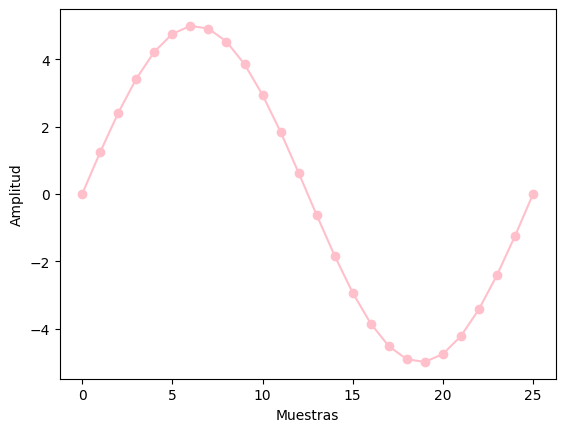

In [ ]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o', color='pink')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

a) Compruebe que los valores de las primeras cinco muestras son los mismos

In [ ]:
# Comparar las primeras 5 muestras de ambas señales
first_5_x = x[:5]
first_5_x1 = x1[:5]

# Verificar si las muestras son iguales
if np.array_equal(first_5_x, first_5_x1):
    print("Las primeras 5 muestras de ambas señales son iguales.")
else:
    print("Las primeras 5 muestras de ambas señales son diferentes.")

print("Primeras 5 muestras de la señal con eje x en tiempo:", first_5_x)
print("Primeras 5 muestras de la señal con eje x en muestras:", first_5_x1)


Las primeras 5 muestras de ambas señales son iguales.
Primeras 5 muestras de la señal con eje x en tiempo: [0.         1.24344944 2.40876837 3.42273553 4.22163963]
Primeras 5 muestras de la señal con eje x en muestras: [0.         1.24344944 2.40876837 3.42273553 4.22163963]


Al comparar los valores de las primeras cinco muestras de ambas señales, se pudo comprobar que son efectivamente los mismos. Esto ocurre porque, aunque las dos señales están representadas en diferentes dominios (tiempo continuo para la señal analógica y tiempo discreto para la señal muestreada), ambas describen la misma función sinusoidal con los mismos parámetros de frecuencia y amplitud. La única diferencia entre las representaciones radica en los ejes temporales utilizados: uno en segundos y el otro en número de muestras. Sin embargo, al ser coherentes los parámetros de muestreo, las muestras discretizadas coinciden con los valores de la señal continua en los puntos correspondientes. Esto demuestra que la digitalización preserva la información esencial de la señal original, siempre que se utilice una frecuencia de muestreo adecuada [1].

Otra manera de graficar las señales muestreadas es mediante la función stem:

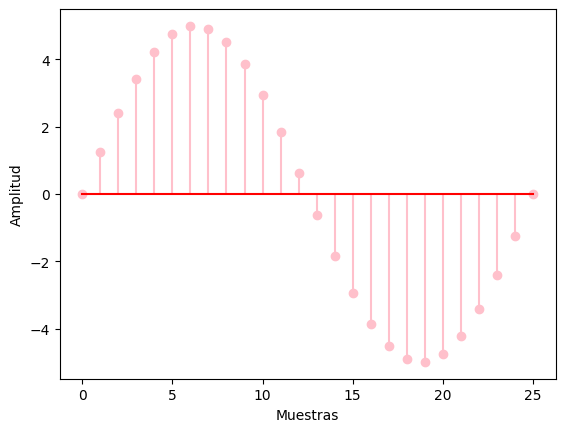

In [ ]:
plt.stem(n, x1, linefmt='pink', markerfmt='o', basefmt='r')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

## 2. Energía y potencia en el dominio del tiempo

In [ ]:
## Calcular energía, potencia y RMS para 10 ciclos discreta
t1 = np.arange(0, 10*Tp+T, T)
x1 = A * np.sin(2 * np.pi * Fo * t1)

# Calcular energía, potencia y RMS para 10 ciclos
energia10_1 = sum(x1**2)
potencia10_1 = energia10_1 / (len(t1) - 1)
rms10_1 = np.sqrt(potencia10_1)

print(f"Energía de un ciclo: {energia10_1}")
print(f"Potencia de un ciclo: {potencia10_1}")
print(f"RMS de un ciclo: {rms10_1}")

Energía de un ciclo: 3125.0000000000014
Potencia de un ciclo: 12.500000000000005
RMS de un ciclo: 3.535533905932738


In [ ]:
## Calcular energía, potencia y RMS para 10 ciclos continua
t10 = np.arange(0, 10 * Tp + T, T)
x10 = A * np.sin(2 * np.pi * Fo * t10)

# Calcular energía, potencia y RMS para 10 ciclos
energia10 = sum(x10**2)
potencia10 = energia10 / (len(t10) - 1)
rms10 = np.sqrt(potencia10)

print(f"Energía de 10 ciclos: {energia10}")
print(f"Potencia de 10 ciclos: {potencia10}")
print(f"RMS de 10 ciclos: {rms10}")

Energía de 10 ciclos: 3125.0000000000014
Potencia de 10 ciclos: 12.500000000000005
RMS de 10 ciclos: 3.535533905932738


b) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

Comparando la señal continua y la discreta se puede decir que la potencia de la señal en x(t) y en x(n) es la misma porque, aunque x(t) se encuentra en el dominio continuo y x(n) en el dominio discreto, el proceso de muestreo no modifica el contenido energético de la señal. El muestreo simplemente toma valores de la señal continua en intervalos regulares, conservando las amplitudes y la relación con la frecuencia original. Por lo tanto, aunque el tiempo en x(n) se representa mediante números enteros en lugar de una escala continua, los valores de la señal y su comportamiento general se mantienen. Debido a esto, tanto la energía como la potencia media calculadas para x(t) y
x(n) son equivalentes, ya que dependen de los mismos valores de amplitud de la señal muestreada.

## 3. Análisis de Fourier en tiempo discreto:

In [ ]:
X10 = np.fft.fft(x10)

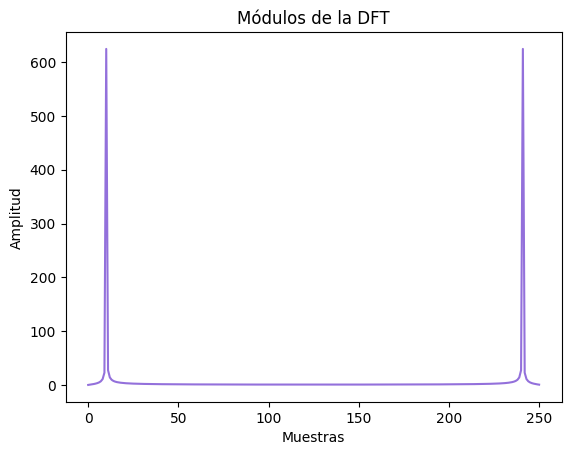

In [ ]:
plt.plot(abs(X10), color='mediumpurple')
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


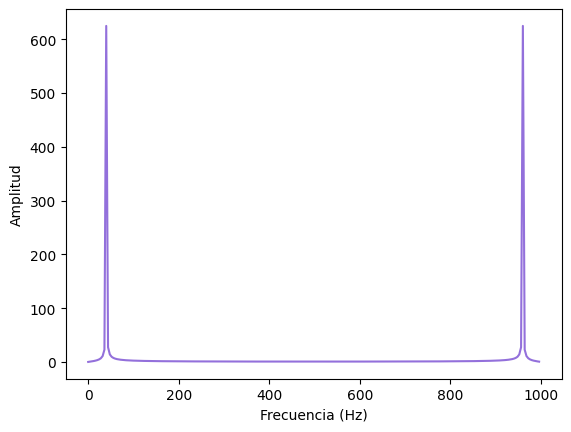

In [ ]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10), color='mediumpurple')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


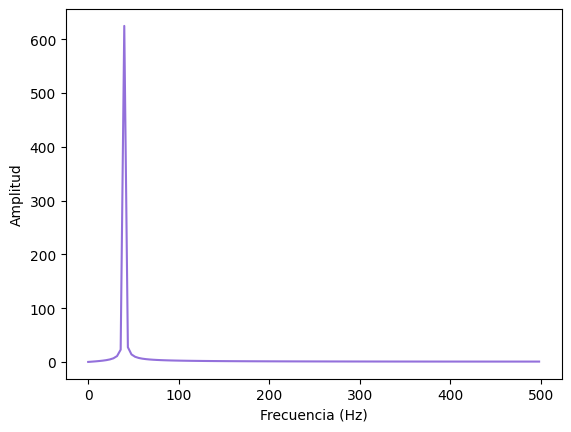

In [ ]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad), color='mediumpurple')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

Realizando un zoom se observa que la componente frecuencial se encuentra ubicada a 40 Hz

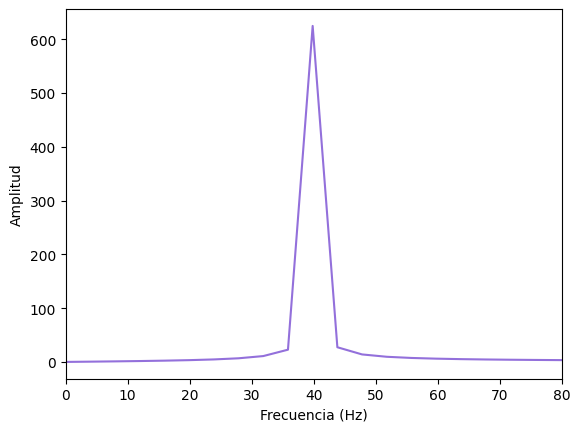

In [ ]:
plt.plot(Fmitad,abs(X10mitad), color='mediumpurple')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

## 4. Periodogramas



```
#importamos la rutina de welch
from scipy.signal import welch as pwelch

#%% USANDO WELCH
fs = 1000 # frecuencia de muestreo
nperseg = 2000 #ancho de la ventana
noverlap = int(nperseg/2) #solapamiento de las ventanas

f, Pxx = pwelch(senal[0,:], fs, 'hanning', nperseg, noverlap)
#grafiamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 50]) #rango para el eje X
plt.show()

```



## 5. Aplicación

#### 5.1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente

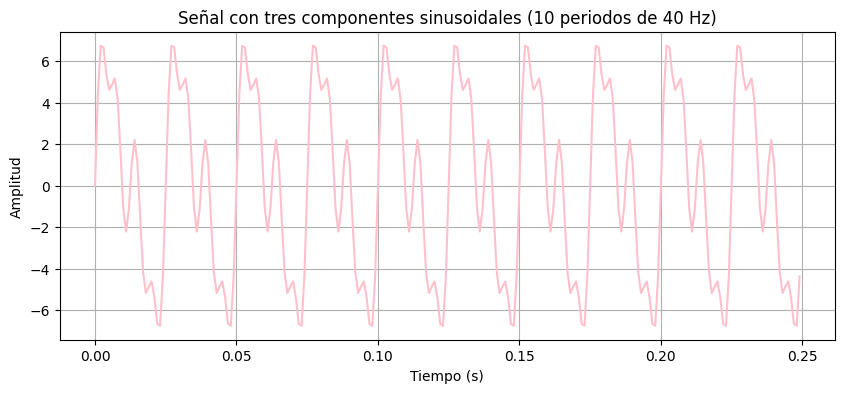

In [ ]:
# Parámetros de la señal
f1 = 40   # Frecuencia 1 en Hz
f2 = 80   # Frecuencia 2 en Hz
f3 = 160  # Frecuencia 3 en Hz

# Frecuencia de muestreo (debe ser mayor que el doble de la frecuencia más alta)
Fs = 1000        # Frecuencia de muestreo elegida (1000 Hz)
T = 1 / Fs       # Periodo de muestreo

# Tiempo para 10 ciclos
Tp = 1 / f1  # Periodo de 40 Hz
t_total = 10 * Tp  # Duración de 10 periodos
t = np.arange(0, t_total, T)  # Vector de tiempo para 10 periodos

# Crear la señal con las tres componentes sinusoidales
signal = 5 * np.sin(2 * np.pi * f1 * t) + 3 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, signal, color='pink')
plt.title('Señal con tres componentes sinusoidales (10 periodos de 40 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Para asegurar una representación adecuada de la señal compuesta, es fundamental aplicar el Teorema de Muestreo de Nyquist, que establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia más alta presente en la señal [2]. Dado que la mayor frecuencia de la señal es de 160 Hz, la frecuencia de muestreo mínima requerida sería de 320 Hz.

En este caso, se ha elegido una frecuencia de muestreo de 1000 Hz, lo cual supera con el mínimo necesario y asegura que todas las componentes frecuenciales de la señal (40 Hz, 80 Hz y 160 Hz) se representen adecuadamente sin distorsión por aliasing. Esto es importante para capturar correctamente la información tanto de las frecuencias bajas como de las altas.


#### 5.2. Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).

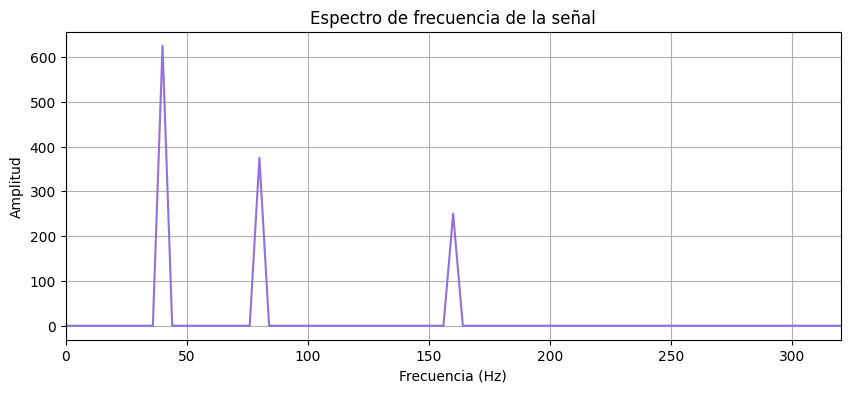

In [ ]:
# Calcular la DFT usando FFT
N = len(signal)  # Número de puntos en la DFT
X = np.fft.fft(signal)
f = np.arange(0, N) * Fs / N  # Frecuencias correspondientes

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(f, np.abs(X), color='mediumpurple')
plt.title('Espectro de frecuencia de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)
plt.grid(True)
plt.show()


Frecuencias encontradas en el espectro: [ 40.  80. 160.]


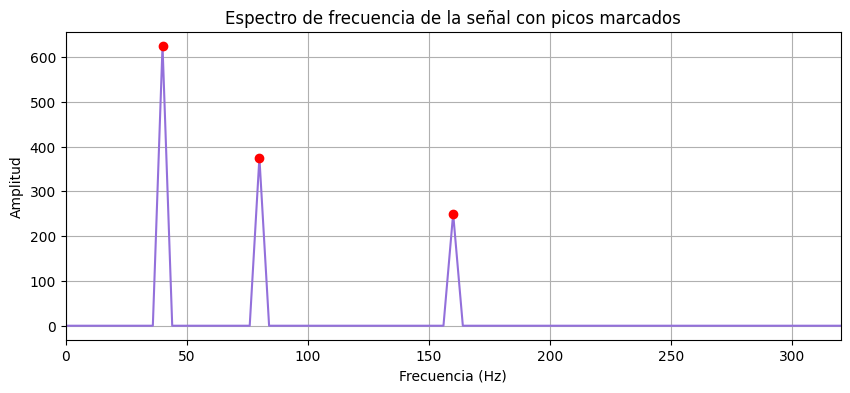

In [ ]:
# Identificar las frecuencias presentes en el espectro (hasta la frecuencia de Nyquist)
Nmitad = int(np.ceil(N/2))
Fmitad = f[:Nmitad]
Xmitad = X[:Nmitad]
# Buscar los picos en la magnitud de la DFT
peaks, _ = find_peaks(np.abs(Xmitad), height=100)  # Ajusta el parámetro 'height' para filtrar picos pequeños

# Imprimir las frecuencias correspondientes a los picos
frecuencias_picos = Fmitad[peaks]
print("Frecuencias encontradas en el espectro:", frecuencias_picos)

# Graficar nuevamente el espectro y marcar los picos
plt.figure(figsize=(10, 4))
plt.plot(Fmitad, np.abs(Xmitad), color='mediumpurple')
plt.plot(Fmitad[peaks], np.abs(Xmitad)[peaks], 'ro')  # Marcar los picos en rojo
plt.title('Espectro de frecuencia de la señal con picos marcados')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)
plt.grid(True)
plt.show()


#### 5.3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior [3].

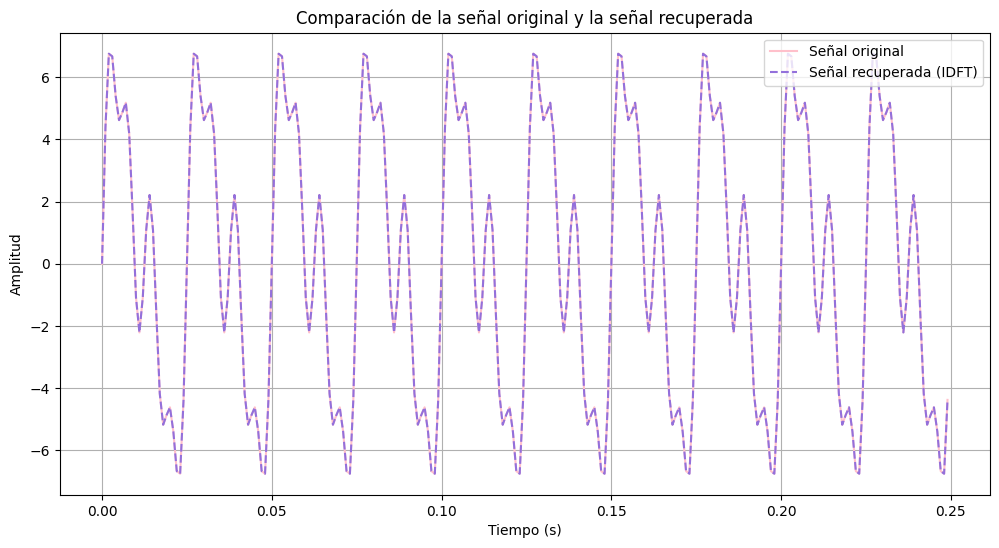

In [ ]:
# Calcular la Transformada Inversa de Fourier (IDFT)
signal_recuperada = np.fft.ifft(X)

# Graficar la señal original y la señal recuperada en una sola figura
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Señal original', color='pink')  # Señal original (línea continua)
plt.plot(t, np.real(signal_recuperada), '--', label='Señal recuperada (IDFT)', color='mediumpurple')  # Señal recuperada (línea discontinua)
plt.title('Comparación de la señal original y la señal recuperada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


La función numpy.fft.ifft en Python permite calcular la Transformada Inversa de Fourier de una secuencia o señal en el dominio de la frecuencia. Esta función toma una secuencia de números complejos, generalmente obtenida después de aplicar la Transformada de Fourier (FFT) a una señal, y devuelve la señal original en el dominio del tiempo. Al aplicar la transformada inversa, se recupera la forma temporal de la señal a partir de su representación en el dominio de la frecuencia, manteniendo la relación original de amplitud y fase.

En particular, la ifft se usa cuando, después de haber realizado modificaciones en el dominio de la frecuencia (como aplicar un filtro), se desea regresar al dominio del tiempo para visualizar o analizar la señal resultante. La función asegura que la transformación sea inversa a la realizada por la fft y devuelve una secuencia que representa la señal reconstruida [3].

#### 5. 4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?


```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```



Las líneas de código aplican un tipo de filtrado en el dominio de la frecuencia. Inicialmente, se realiza la Transformada Rápida de Fourier (FFT) de la señal \(x\), que convierte la señal del dominio del tiempo al dominio de la frecuencia, representada por \(F1\). Luego, se crea una nueva matriz \(F2\) de ceros, de la misma longitud que \(F1\), en la cual solo se conservan los componentes de frecuencia en las posiciones 9 a 13. Al establecer los demás componentes de frecuencia en cero, se eliminan todas las frecuencias fuera de este rango. Finalmente, la transformada inversa de Fourier (IFFT) se aplica a \(F2\), obteniendo una señal filtrada \(xr\) en el dominio del tiempo, que solo contiene las frecuencias seleccionadas. Este proceso es equivalente a un filtro pasabanda, ya que permite el paso de un rango específico de frecuencias y atenúa las demás.

### Extraiga de manera similar cada una de las componentes de la señal.

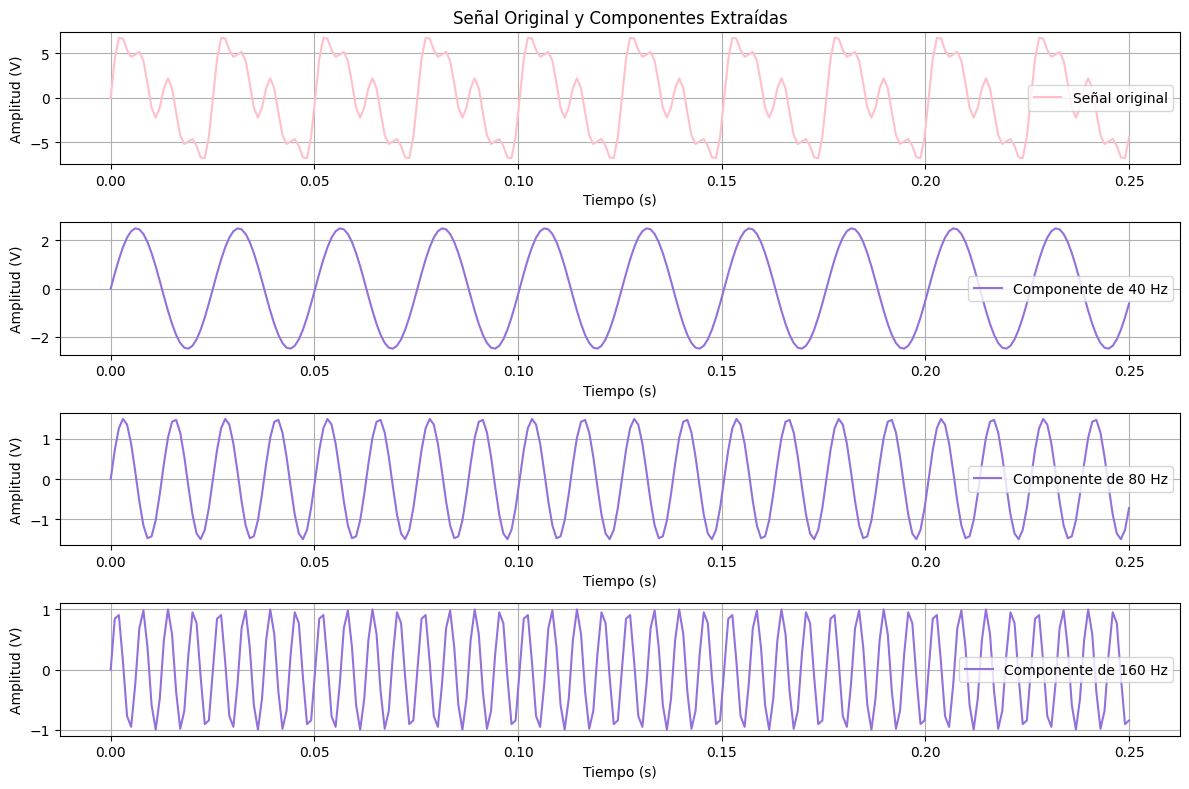

In [ ]:
# Aplicar la DFT
F1 = np.fft.fft(signal)
t = np.linspace(0, len(signal)/Fs, len(signal))


# Función para filtrar una sola frecuencia
def filtrar_frecuencia(F1, indice_inicio, indice_fin):
    F2 = np.zeros(len(F1), dtype=complex)  # Crear un array de ceros complejo
    F2[indice_inicio:indice_fin] = F1[indice_inicio:indice_fin]  # Conservar solo el rango deseado
    return np.fft.ifft(F2)

# Extraer componente de 40 Hz
xr_40 = filtrar_frecuencia(F1, 9, 13)

# Extraer componente de 80 Hz
xr_80 = filtrar_frecuencia(F1, 19, 23)

# Extraer componente de 160 Hz
xr_160 = filtrar_frecuencia(F1, 39, 43)

# Graficar las señales originales y filtradas
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(t, signal, label='Señal original', color='pink')
plt.title('Señal Original y Componentes Extraídas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 40 Hz
plt.subplot(4, 1, 2)
plt.plot(t, np.real(xr_40), label='Componente de 40 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 80 Hz
plt.subplot(4, 1, 3)
plt.plot(t, np.real(xr_80), label='Componente de 80 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 160 Hz
plt.subplot(4, 1, 4)
plt.plot(t, np.real(xr_160), label='Componente de 160 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### 5.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [ ]:
# Cargar el archivo .mat proporcionado
drive.mount('/content/drive')

# Ruta del archivo Excel en Google Drive
file_path = '/content/drive/MyDrive/Bioseñales/Práctica 5/senecg.mat'

mat_data = scipy.io.loadmat(file_path)

# Obtener las claves del archivo para identificar la estructura de los datos
keys = mat_data.keys()

# Mostrar las claves encontradas en el archivo .mat para identificar las variables disponibles
keys

Mounted at /content/drive


dict_keys(['__header__', '__version__', '__globals__', 'ECG'])

In [ ]:
# Extraer la señal de ECG del archivo .mat
ecg_signal = mat_data['ECG']

# Revisar la forma de la señal de ECG para entender su estructura
ecg_signal_shape = ecg_signal.shape

# Mostrar la forma de la señal
ecg_signal_shape

(1250, 1)

Grafica de la señal original

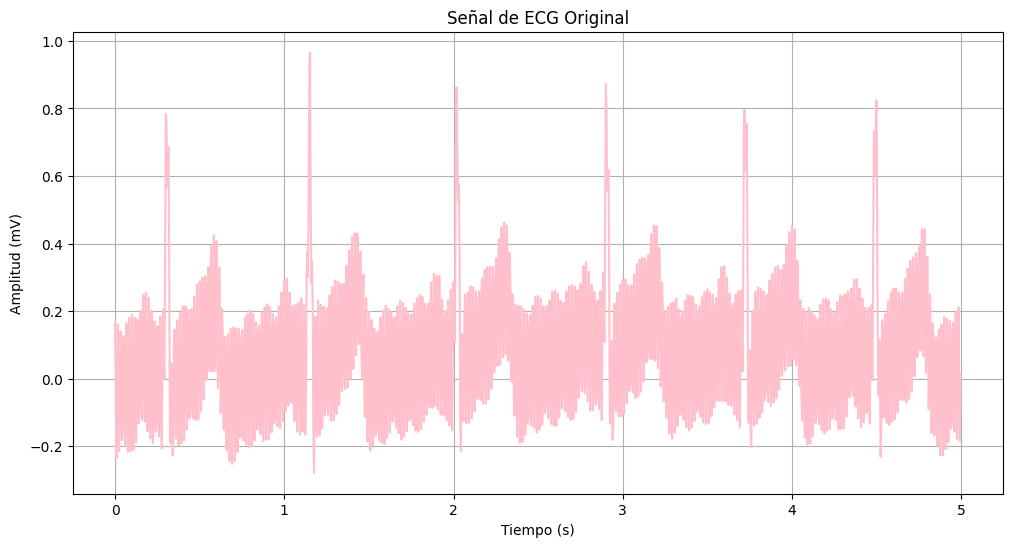

In [ ]:
# Aplanar la señal para evitar problemas de dimensión
ecg_signal = ecg_signal.flatten()

# Parámetros de la señal de ECG
fs = 250  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(ecg_signal) / fs, 1 / fs)  # Vector de tiempo para la señal

# Graficar la señal de ECG original
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, color='pink')
plt.title('Señal de ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


Se grafica el espectro de frecuencia para ver que frecuencias componen la señal de ECG

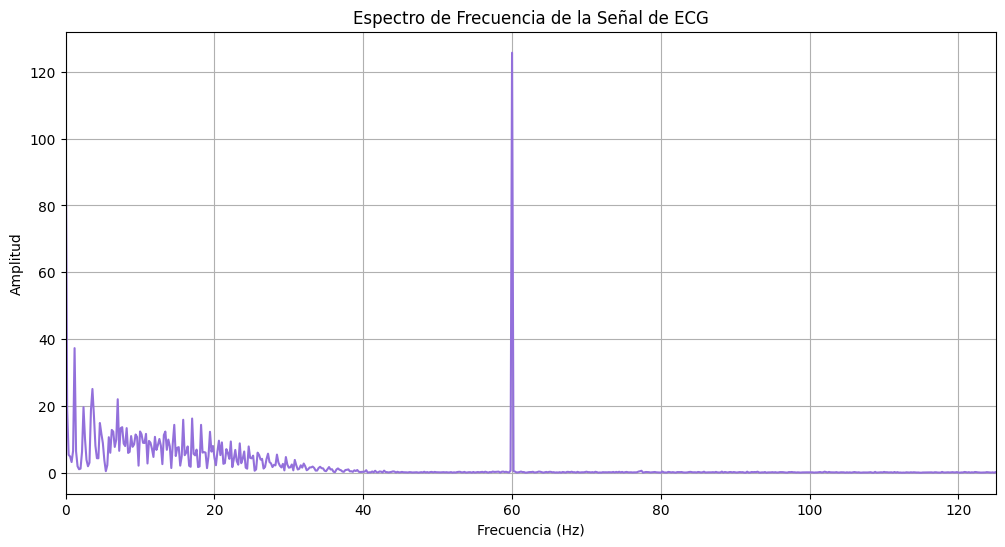

In [ ]:
# Calcular la DFT de la señal de ECG
N = len(ecg_signal)  # Número de puntos en la señal
ecg_fft = np.fft.fft(ecg_signal)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(ecg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Señal de ECG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()


 1. Periodograma de Welch de la señal original

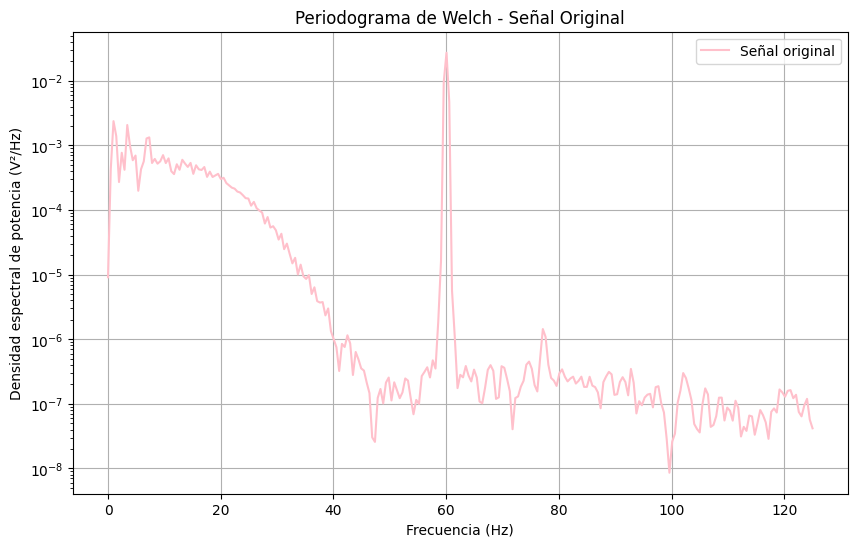

In [ ]:
# Parámetros de la señal de ECG
fs = 250  # Frecuencia de muestreo (Hz)
ecg_signal = ecg_signal.flatten()

# Welch
nperseg = 512  # Ancho de la ventana
noverlap = nperseg // 2  # Solapamiento del 50%
window = get_window('hann', nperseg)  # Crear la ventana Hanning

f, Pxx = welch(ecg_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma de Welch de la señal original
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx, label='Señal original', color='pink')
plt.title('Periodograma de Welch - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.grid(True)
plt.legend()
plt.show()

En este periodograma de Welch, se observa una concentración de energía alrededor de los 60 Hz, lo que es indicativo de la presencia de ruido eléctrico. Este ruido a 60 Hz suele estar asociado a interferencias de la red eléctrica, que es una fuente común de ruido en entornos clínicos y de adquisición de señales.

Se aplica un filtro que elimina esas frecuencias que no son de interés, es decir las mayores de 50 Hz.

2. Determinar si hay ruido y filtrar la señal

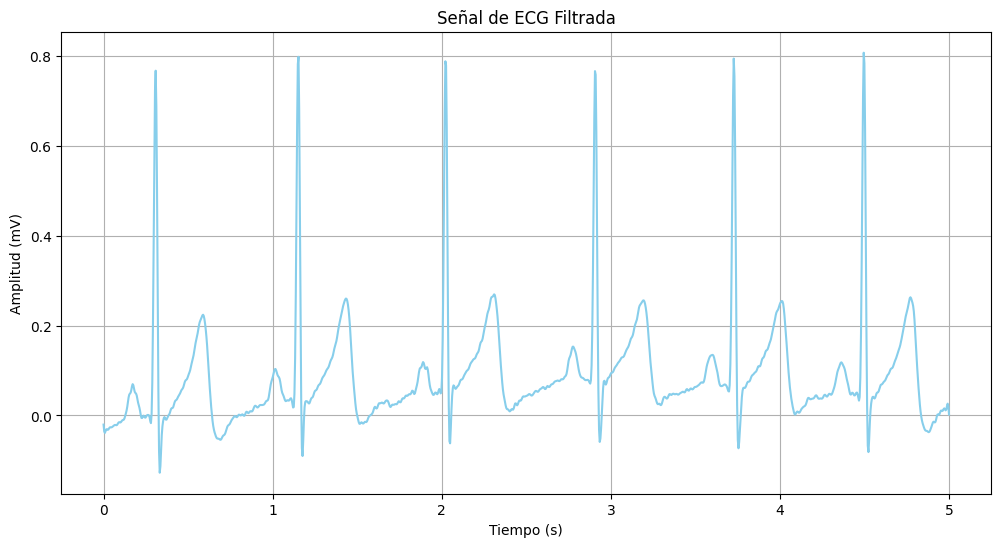

In [ ]:
# Calcular la FFT de la señal original
fft_ecg = np.fft.fft(ecg_signal)

# Definir las frecuencias correspondientes
n = len(fft_ecg)
frequencias = np.fft.fftfreq(n, d=1/fs)

# Definir los índices para las frecuencias a conservar (por ejemplo, entre 0 y 50 Hz)
frecuencia_corte = 50  # Frecuencia de corte en Hz
indices_frecuencia = np.where((frequencias >= 0) & (frequencias <= frecuencia_corte))

# Aplicar el filtro para mantener solo las frecuencias deseadas
fft_ecg_filtrada = np.zeros(n, dtype=complex)
fft_ecg_filtrada[indices_frecuencia] = fft_ecg[indices_frecuencia]

# Conservar también las frecuencias negativas
fft_ecg_filtrada[-len(indices_frecuencia[0]):] = fft_ecg[-len(indices_frecuencia[0]):]

# Calcular la señal filtrada usando la IFFT
ecg_filtrada = np.fft.ifft(fft_ecg_filtrada)

# Graficar la señal filtrada
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(ecg_signal)/fs, len(ecg_signal)), np.real(ecg_filtrada), color='skyblue')  # Graficar la parte real de la señal
plt.title('Señal de ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()

Comprobar con el periodograma:

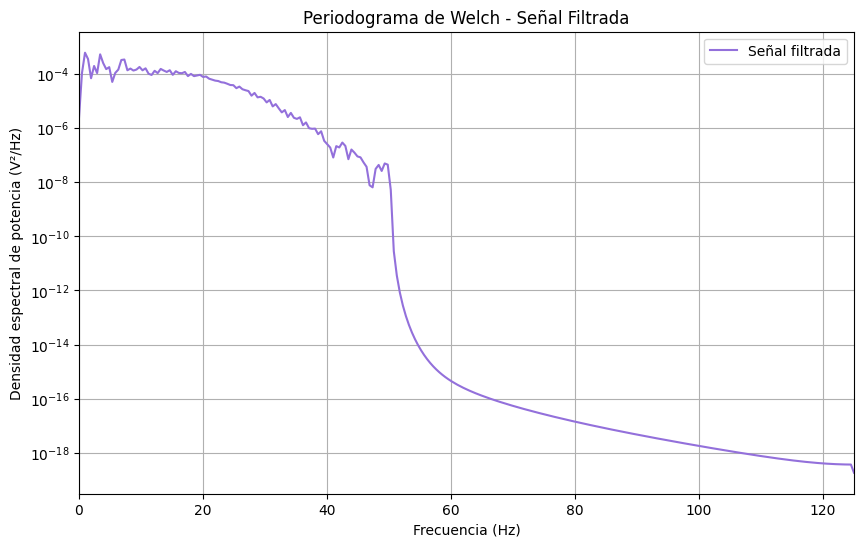

In [ ]:
# FFT de la señal original
ecg_fft = fft(ecg_signal)

# Filtrar la señal entre las frecuencias deseadas (ejemplo: 0-50 Hz)
indice_inicio = 0  # Índice correspondiente a 0 Hz
indice_fin = int(50 * len(ecg_signal) / fs)  # Índice correspondiente a 50 Hz
ecg_filtrada = filtrar_frecuencia(ecg_fft, indice_inicio, indice_fin)

# Periodograma de Welch de la señal filtrada
f_filtrada, Pxx_filtrada = welch(ecg_filtrada.real, fs, window='hann', nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma de la señal filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(f_filtrada, Pxx_filtrada, label='Señal filtrada', color='mediumpurple')
plt.title('Periodograma de Welch - Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.grid(True)
plt.xlim(0, 125)  # Limitar a la frecuencia de Nyquist
plt.legend()
plt.show()



El nuevo periodograma de Welch obtenido tras el filtrado de la señal de ECG muestra una reducción de potencia en la frecuencia de 60 Hz, que previamente estaba asociada al ruido eléctrico. Esto indica que el proceso de filtrado fue bueno para eliminar esa interferencia no deseada, permitiendo que las componentes de baja frecuencia, las más relevantes para el análisis del ECG, se mantengan sin distorsiones.

El uso de un ancho de ventana de 512 muestras y un solapamiento del 50% en el periodograma, permite una buena resolución en el dominio de la frecuencia y una estimación estable de la densidad espectral de potencia. El ancho de ventana seleccionado es suficiente para capturar adecuadamente las características de baja frecuencia de la señal, mientras que el solapamiento mejora la consistencia de la estimación sin introducir redundancia innecesaria.

#### 5.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [ ]:
drive.mount('/content/drive')

# Ruta al archivo ZIP
zip_file_path = '/content/drive/MyDrive/Bioseñales/Práctica 5/control.zip'

# Directorio de extracción
extracted_control = '/content/drive/MyDrive/Bioseñales/Práctica 5/extracted_data/'

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_control)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')

# Ruta al archivo ZIP
zip_file_path = '/content/drive/MyDrive/Bioseñales/Práctica 5/parkinson.zip'

# Directorio de extracción
extracted_parkinson = '/content/drive/MyDrive/Bioseñales/Práctica 5/extracted_data/'

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_parkinson)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EEG de un paciente sano (un solo canal):

In [ ]:
archivos_control = os.listdir(extracted_control + "/control")
sujeto_control = sio.loadmat(extracted_control + "/control/" + archivos_control[0])
data_control = sujeto_control['data']
c1_control = data_control[:, :, :]
print(c1_control.shape)

(8, 2000, 149)


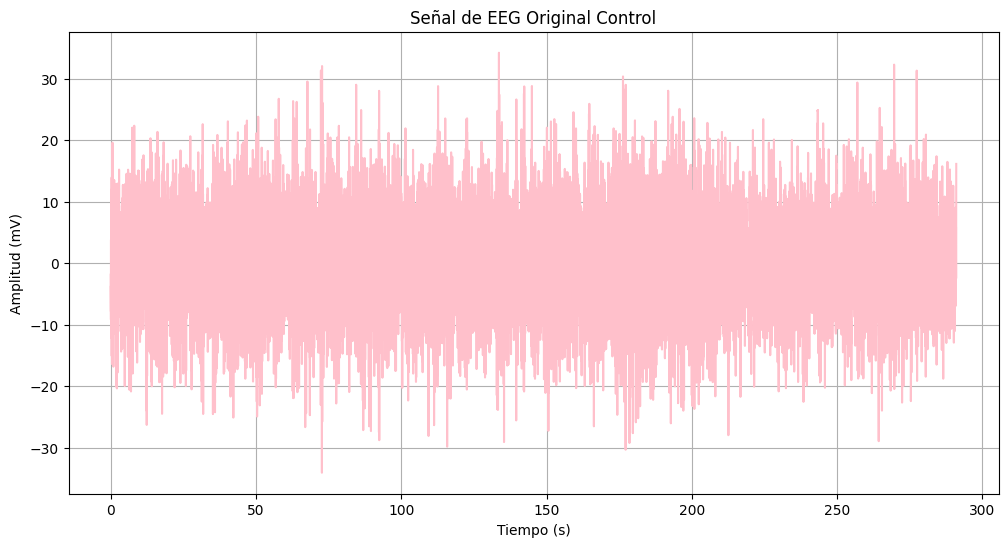

In [ ]:
eeg_control = np.reshape(c1_control, (c1_control.shape[0], c1_control.shape[1]*c1_control.shape[2]), order="F")[7]

# Parámetros de la señal de EEG
fs = 1024  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(eeg_control) / fs, 1 / fs)  # Vector de tiempo para la señal

# Graficar la señal de EEG original
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_control, color='pink')  # Seleccionando la primera muestra
plt.title('Señal de EEG Original Control')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


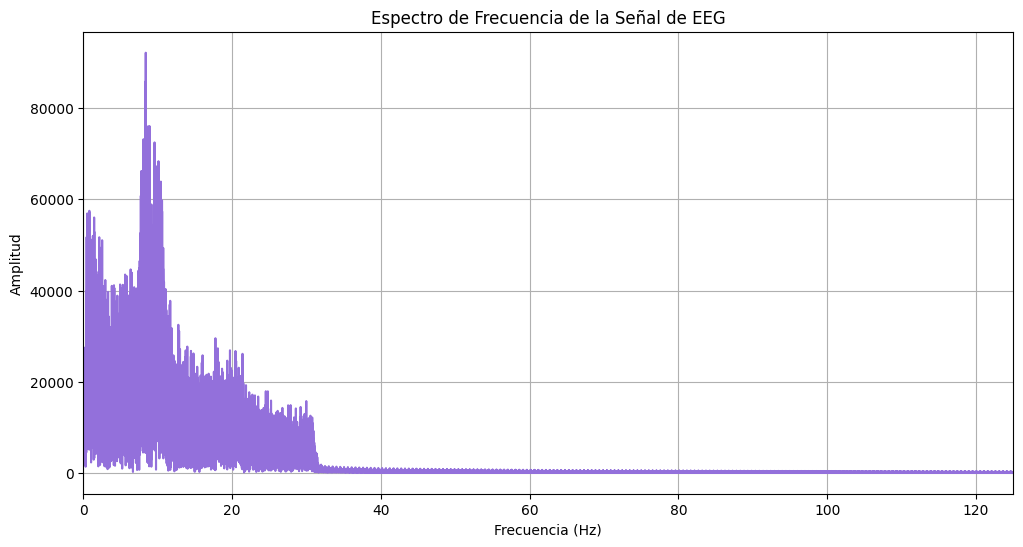

In [ ]:
# Calcular la DFT de un canal específico de la señal de EEG
N = len(eeg_control)  # Número de puntos en un solo columna
eeg_fft = np.fft.fft(eeg_control)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(eeg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Señal de EEG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()


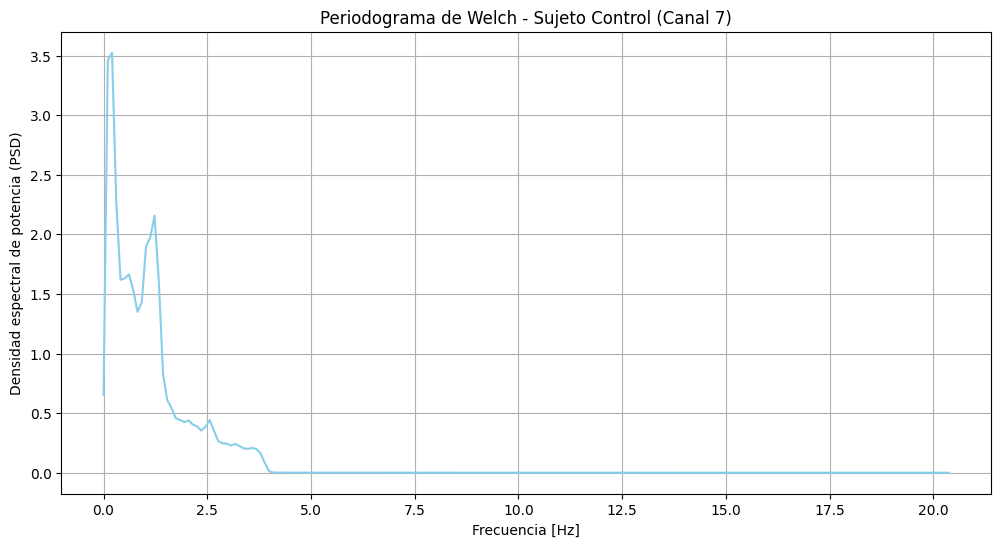

In [ ]:
fs = 1024  # Frecuencia de muestreo de las señales EEG
window_size = 10000  # Tamaño de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%

# Crear la ventana de Hann con el tamaño correcto
window = get_window('hann', window_size)

# Se aplica el periodograma de Welch a la señal del sujeto Control
f_control, pxx_control = welch(eeg_control, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se grafican los periodogramas
plt.figure(figsize=(12, 6))
plt.plot(abs(f_control[0:200]), pxx_control[0:200], color="skyblue")
plt.title('Periodograma de Welch - Sujeto Control (Canal 7)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.grid()
plt.show()

In [ ]:
archivos_parkinson = os.listdir(extracted_parkinson + "/parkinson")
sujeto_parkinson = sio.loadmat(extracted_control + "/parkinson/" + archivos_parkinson[0])
data_parkinson = sujeto_parkinson['data']
c1_parkinson = data_parkinson[:, :, :]
print(c1_parkinson.shape)

(8, 2000, 143)


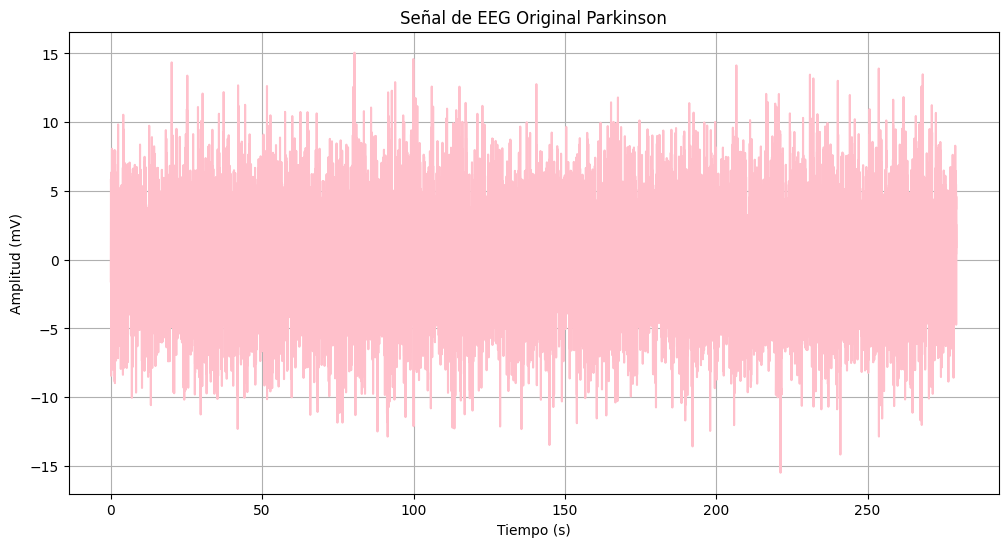

In [ ]:
eeg_parkinson = np.reshape(c1_parkinson, (c1_parkinson.shape[0], c1_parkinson.shape[1]*c1_parkinson.shape[2]), order="F")[7]

# Parámetros de la señal de EEG
fs = 1024  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(eeg_parkinson) / fs, 1 / fs)  # Vector de tiempo para la señal

# Graficar la señal de EEG original
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_parkinson, color='pink')  # Seleccionando el primer canal
plt.title('Señal de EEG Original Parkinson')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


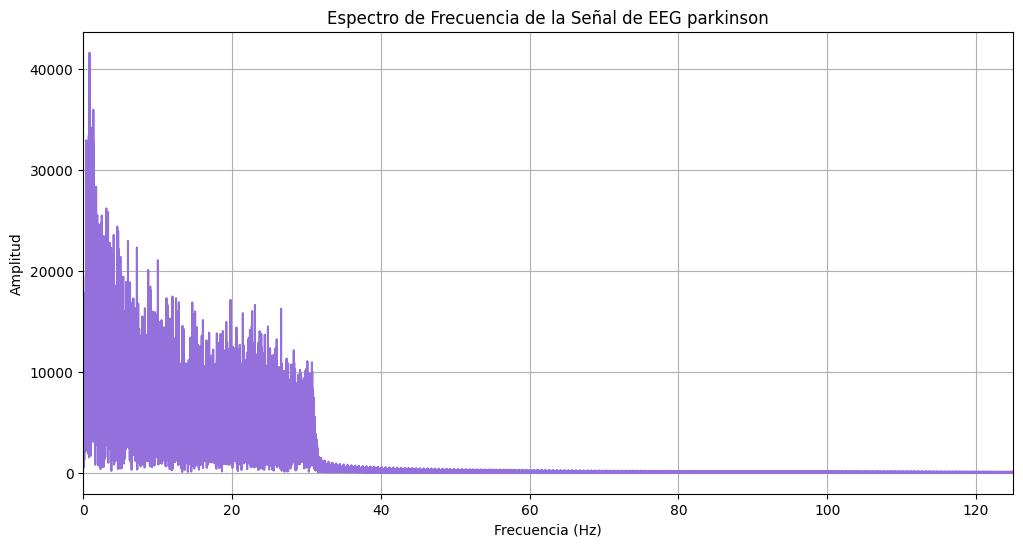

In [ ]:
# Calcular la DFT de un canal específico de la señal de EEG
N = len(eeg_parkinson)  # Número de puntos
eeg_fft = np.fft.fft(eeg_parkinson)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(eeg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Señal de EEG parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()

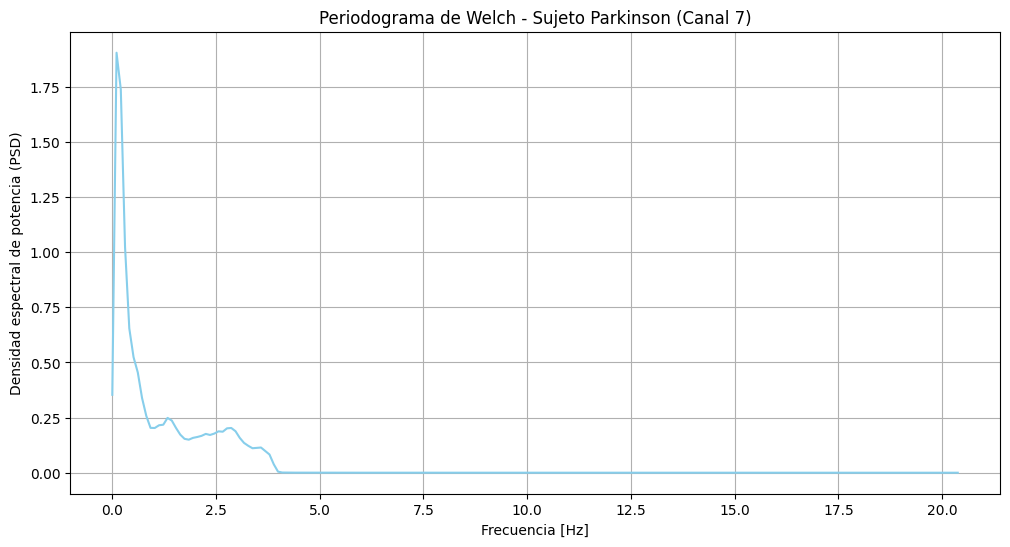

In [ ]:
fs = 1024  # Frecuencia de muestreo de las señales EEG
window_size = 10000  # Tamaño de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%

# Crear la ventana de Hann con el tamaño correcto
window = get_window('hann', window_size)

# Se aplica el periodograma de Welch a la señal del sujeto Control
f_parkinson, pxx_parkinson = welch(eeg_parkinson, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se grafican los periodogramas
plt.figure(figsize=(12, 6))
plt.plot(abs(f_parkinson[0:200]), pxx_parkinson[0:200], color="skyblue")
plt.title('Periodograma de Welch - Sujeto Parkinson (Canal 7)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.grid()
plt.show()

Comparando los periodogramas de Welch de ambos sujetos, se observa que el sujeto control presenta un pico de potencia significativo en torno a 1 Hz, seguido de una caída rápida de la potencia en frecuencias superiores a 2 Hz, estabilizándose después de 5 Hz. Esto es típico de un EEG saludable, con una fuerte actividad en las bandas delta (frecuencias más bajas) y una organización adecuada de las señales neuronales. En el caso del sujeto con Parkinson, aunque el patrón general es similar, la densidad espectral de potencia es menor en el pico de 1 Hz, lo que sugiere una menor cantidad de energía en las bandas bajas, y se observa una mayor variabilidad entre 1 Hz y 5 Hz. Esta mayor dispersión de la energía en las frecuencias bajas podría estar asociada con la desincronización neuronal característica de la enfermedad de Parkinson [5].

El uso de una ventana de 10,000 muestras en el cálculo del periodograma de Welch está justificado considerando la frecuencia de muestreo de 1024 Hz, lo que cubre aproximadamente 10 segundos de señal por ventana. Este tamaño de ventana es suficiente para capturar las frecuencias relevantes para el EEG, principalmente aquellas inferiores a los 20 Hz, que son las más informativas en este tipo de análisis. Además, con aproximadamente 298,000 puntos en la señal, este tamaño de ventana permite una segmentación adecuada de la señal en varias ventanas, manteniendo un equilibrio adecuado entre la resolución temporal y frecuencial. El solapamiento del 50% también es el más común, y es útil ya que mejora la consistencia en la estimación de la densidad espectral, lo que es importante en señales EEG, donde las variaciones rápidas de frecuencia pueden contener información de importancia para el análisis de patologías como el Parkinson.

#Conclusiones

El análisis frecuencial de las bioseñales es importante para comprender mejor sus características en el dominio de la frecuencia y su relevancia en diversas condiciones fisiológicas. Herramientas como la Transformada de Fourier y el periodograma de Welch son particularmente útiles para identificar componentes en señales como el EEG y el ECG, así como para filtrar el ruido no deseado, lo que mejora la calidad de los datos adquiridos.

La elección de una ventana adecuada y un solapamiento del 50% proporciona un equilibrio óptimo entre la resolución temporal y frecuencial, permitiendo capturar con precisión las características más importantes de las señales. Estos parámetros seleccionados garantizan un análisis detallado, importante para la interpretación de las bioseñales.

Este tipo de análisis no solo tiene aplicaciones relevantes en la ingeniería biomédica, sino que también posee importantes implicaciones clínicas. Una correcta interpretación de las señales puede influir directamente en decisiones diagnósticas y terapéuticas, impactando positivamente en la atención al paciente.

#Referencias

[1] Signals and Systems. (s.f.). Home | Princeton University. https://www.princeton.edu/~cuff/ele301/files/lecture1_2.pdf

[2] Nyquist Theorem - an overview. ScienceDirect. [Online]. Available: https://www.sciencedirect.com/topics/engineering/nyquist-theorem. [Accessed: Oct. 24, 2024].

[3]	“Numpy.Fft.Ifft — NumPy v2.2.dev0 manual,” Numpy.org. [Online]. Available: https://numpy.org/devdocs/reference/generated/numpy.fft.ifft.html. [Accessed: 23-Oct-2024].

[4] Attar ET. Review of electroencephalography signals approaches for mental stress assessment. Neurosciences (Riyadh). 2022 Oct;27(4):209-215. doi: 10.17712/nsj.2022.4.20220025. PMID: 36252972; PMCID: PMC9749579.

[5]	“Differences in EEG spectral features in Alzheimer’s and Parkinson’s disease with mild cognitive impairment,” MDS Abstracts, 01-Aug-2023. [Online]. Available: https://www.mdsabstracts.org/abstract/differences-in-eeg-spectral-features-in-alzheimers-and-parkinsons-disease-with-mild-cognitive-impairment/. [Accessed: 24-Oct-2024].
